# Writing a Data Scientist Blog Post 

In this project, as part of deliverable 1 of the data scientist program, the Seattle Airbnb data has been analyzed. In which some questions have been formulated and which will be resolved with the following solution following the CRISP-DM methodology

Suppose we are going to have relevant information for tourists or people who need to stay in the city of Seattle for A or B reason. It is important that the public knows the influx of people in the city, the types of accommodation and the prices of each one.
Based on the above, the following questions are formulated: 

What are the months of greatest demand in the year?

What is the type of rooms and how many of each?What is the average daily price per room type?





## Import Libraries

In [5]:
#Import libraries
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

## Load data sets

In [7]:
df_lis = pd.read_csv('listings.csv')
df_cal=pd.read_csv('calendar.csv')

## Explore data

In [9]:
#Get information about the number of rows and columns
print(df_lis.shape)
print(df_cal.shape)



(3818, 92)
(1393570, 4)


In [10]:
#View of the first three rows of the data set
df_lis.head(3)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15


In [11]:
#View of the first three rows of the data set
df_cal.head(3)


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN


In [12]:
df_lis.isnull().sum()


id                                    0
listing_url                           0
scrape_id                             0
last_scraped                          0
name                                  0
                                   ... 
cancellation_policy                   0
require_guest_profile_picture         0
require_guest_phone_verification      0
calculated_host_listings_count        0
reviews_per_month                   627
Length: 92, dtype: int64

In [13]:
df_cal.isnull().sum()


listing_id         0
date               0
available          0
price         459028
dtype: int64

In [14]:
# The data types and the number of these data types in the dataset
df_lis.dtypes.value_counts()



object     62
float64    17
int64      13
Name: count, dtype: int64

In [15]:
# The data types and the number of these data types in the dataset
df_cal.dtypes.value_counts()


object    3
int64     1
Name: count, dtype: int64

In [16]:

df_cal.sample(3)


,listing_id,date,available,price
1030870,13068,2016-04-23,t,$574.00
7760,4125779,2016-04-08,t,$119.00
31500,3294243,2016-04-23,t,$170.00


In [17]:
df_cal.dtypes[df_cal.dtypes=='int64']

listing_id    int64
dtype: object

In [18]:
pd.set_option('display.max_rows', 4)
df_cal.dtypes[df_cal.dtypes=='object']

date         object
available    object
price        object
dtype: object

## Clean data

In [20]:
## Convert datatype

df_cal['price'] = df_cal['price'].str.replace(',', '')
df_cal['price'] = df_cal['price'].str.replace('$', '')
df_cal['price'] = df_cal['price'].astype(float)


In [21]:
#Convert column date to datetime
df_cal['date'] = pd.to_datetime(df_cal['date'])

In [22]:
#Make sure the data is in the type you need
df_cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1393570 non-null  int64         
 1   date        1393570 non-null  datetime64[ns]
 2   available   1393570 non-null  object        
 3   price       934542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 42.5+ MB


In [23]:
#Clean Data
#Remove missing values in column price
df_cal = df_cal.dropna(subset=["price"])

In [24]:
df_cal.isnull().sum()

listing_id    0
date          0
available     0
price         0
dtype: int64

In [25]:
#Rename columns to join datasets
df_cal = df_cal.rename(columns = {'listing_id': 'id'})


## Join tables to analyze data

In [27]:
##Join Data Set for Analysis
df_join = pd.merge(df_lis, df_cal, on=['id', 'id'])


In [28]:
df_join.head(3)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,date,available,price_y
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,WASHINGTON,f,moderate,f,f,2,4.07,2016-01-04,t,85.0
1,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,WASHINGTON,f,moderate,f,f,2,4.07,2016-01-05,t,85.0
2,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,WASHINGTON,f,moderate,f,f,2,4.07,2016-01-13,t,85.0


In [29]:
df_join.describe()


,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month,date,price_y
count,9.345420e+05,9.345420e+05,9.345420e+05,934450.000000,934450.000000,934542.000000,934542.000000,934542.000000,929739.000000,932539.000000,...,788613.000000,787724.000000,789050.000000,788526.000000,788428.000000,0.0,934542.000000,795176.000000,934542,934542.000000
mean,5.305517e+06,2.016010e+13,1.515821e+07,8.432040,8.432040,47.628973,-122.333234,3.317107,1.258756,1.284918,...,9.547571,9.782761,9.803579,9.598126,9.427747,NaN,3.363974,2.080989,2016-07-08 08:12:42.911458816,137.944859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
max,1.034016e+07,2.016010e+13,5.316922e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000,2017-01-02 00:00:00,1650.000000
std,2.974821e+06,4.025315e+02,1.439163e+07,31.245915,31.245915,0.043938,0.032318,1.997961,0.582572,0.847862,...,0.795431,0.578456,0.561913,0.629512,0.739723,NaN,6.729892,1.813673,NaN,105.062870


# Results

## Question 1. What are the months of greatest demand in the year?

In [32]:
df_join.sample(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,date,available,price_y
174161,1123977,https://www.airbnb.com/rooms/1123977,20160104002432,2016-01-04,Lovely 1 bedroom apartment,"Instead of staying in a hotel, be our guests i...",Our home has a lovely daylight basement apartm...,"Instead of staying in a hotel, be our guests i...",none,"Located in a great Seattle neighborhood, this ...",...,WASHINGTON,t,strict,f,f,1,0.29,2016-02-25,t,150.0
858020,3817141,https://www.airbnb.com/rooms/3817141,20160104002432,2016-01-04,Charming home in Madison Park,Enjoy your stay in our clean and tidy updated ...,"Our home is clean, quiet and very pleasant.",Enjoy your stay in our clean and tidy updated ...,none,"Great for walking to the beach, restaurants an...",...,WASHINGTON,f,flexible,f,f,1,0.06,2016-03-29,t,200.0
273556,1494828,https://www.airbnb.com/rooms/1494828,20160104002432,2016-01-04,Modern+Clean 2BR Eastlake/Lk Union,"Recently renovated 2BR, centrally located betw...",Tasteful and high quality furnishings and fini...,"Recently renovated 2BR, centrally located betw...",none,"Blocks away from Lake Union, a stone's throw f...",...,WASHINGTON,t,strict,f,f,4,2.83,2016-12-18,t,125.0


In [33]:
#Count records by date
df_demand = df_join.groupby(df_join['date'].dt.strftime('%Y-%m'))['id'].count()
df_demand = pd.DataFrame(df_demand).reset_index()
df_demand = df_demand.rename(columns = {'date':'Month', 'id':'Count'})
#Summary table view
df_demand

,Month,Count
0,2016-01,59239
1,2016-02,73321
...,...,...
11,2016-12,87061
12,2017-01,5698


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '2016-01'),
  Text(1, 0, '2016-02'),
  Text(2, 0, '2016-03'),
  Text(3, 0, '2016-04'),
  Text(4, 0, '2016-05'),
  Text(5, 0, '2016-06'),
  Text(6, 0, '2016-07'),
  Text(7, 0, '2016-08'),
  Text(8, 0, '2016-09'),
  Text(9, 0, '2016-10'),
  Text(10, 0, '2016-11'),
  Text(11, 0, '2016-12'),
  Text(12, 0, '2017-01')])

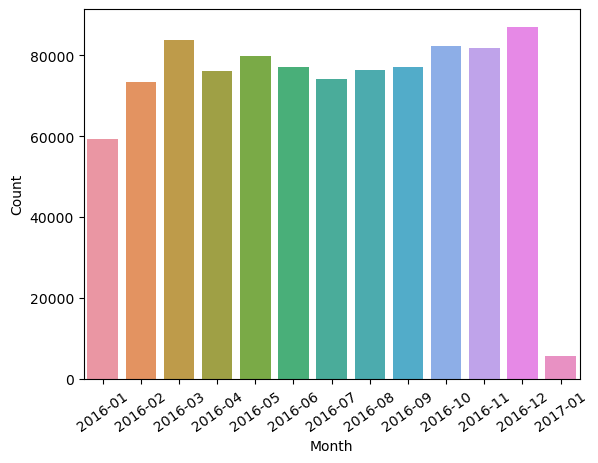

In [34]:
#Graph demand by month
sn.barplot(data=df_demand , x="Month", y="Count")
#Improve the visual angle of the legend
plt.xticks(rotation = 35)

### The most marked demand occurs in the last quarter of the year

## Question 2. What is the type of rooms and how many of each?

In [37]:
##Count room type by date
room_type = df_lis.groupby('room_type')['id'].count()
room_type = pd.DataFrame(room_type).reset_index()
room_type = room_type.rename(columns = {'id': 'Count'})
#Summary table view
print(room_type)

         room_type  Count
0  Entire home/apt   2541
1     Private room   1160
2      Shared room    117


<Axes: xlabel='room_type', ylabel='Count'>

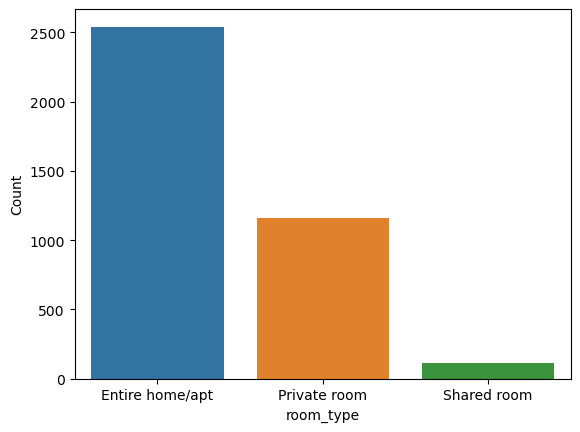

In [38]:
#Graph of the number of rooms by type
sn.barplot(data=room_type, x="room_type", y="Count")

### The room types are: Entire home/apt, private room and shared room, but the most common is Entire home/apt

## Question 3. What is the average daily price per room type?

In [41]:
room_type_avgprice = df_join.groupby('room_type')['price_y'].mean()
room_type_avgprice = pd.DataFrame(room_type_avgprice).reset_index()
room_type_avgprice = room_type_avgprice.rename(columns = {'price_y': 'avg_price'})
room_type_avgprice.avg_price = round(room_type_avgprice.avg_price, 2)
print(room_type_avgprice)

         room_type  avg_price
0  Entire home/apt     173.47
1     Private room      79.35
2      Shared room      48.43


<Axes: xlabel='room_type', ylabel='avg_price'>

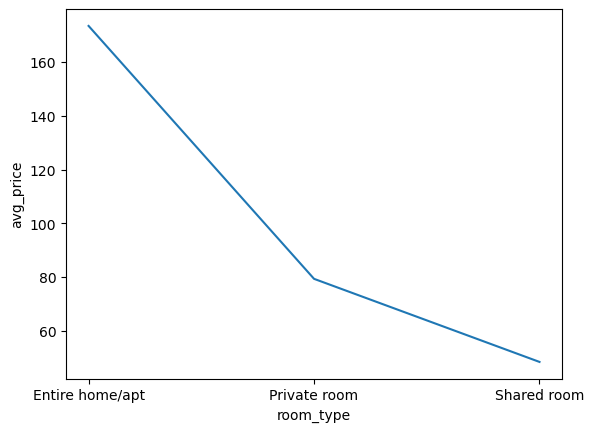

In [42]:
sn.lineplot(data=room_type_avgprice, x="room_type", y="avg_price")


### If people want something economical they have the option of the Shared room which has an average price of 48.43, but if people like something private and with greater comfort there is the option of the Private room with an average price of 79.35 and the most complete that is the Entire home/apt with an average price per day of 173.47.